
# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import pandas as pd
import patsy

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV


## Load the data into a DataFrame
# pd.read_csv()

## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")


# import data

In [2]:
# get Iowa_Liquor_Sales_reduced csv file as a DataFrame. Save in two seprate files(data_store and data_test)
# data_store has one column more than data_test

data_store = pd.read_csv('/Users/generalassembly/Desktop/Iowa_Liquor_sales_sample_10pct.csv')
data_test = pd.read_csv('/Users/generalassembly/Desktop/Iowa_Liquor_sales_sample_10pct.csv')


In [3]:
# info about datasets
data_store.shape

(270955, 18)

In [4]:
# info about datasets
data_store.head()


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [5]:
# Drop unnecessary column
data_test= data_test.drop(['County Number'], axis=1)



In [6]:
data_test.shape

(270955, 17)

In [7]:
# rename the columns
#data_store.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
data_test.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [8]:
#Refine Date
#data_store['Seprate_date']=pd.to_datetime(data_store['Date'])
data_test['Seprate_date']=pd.to_datetime(data_test['Date'])

In [9]:
# number of total NAN
%timeit 

data_test.isnull().values.sum()

1777

In [10]:
#which columns have NAN in the test data
data_test.isnull().any()


Date                     False
Store_Number             False
City                     False
Zip_Code                 False
County                    True
Category                  True
Category_Name             True
Vendor_Number            False
Item_Number              False
Item_Description         False
Bottle_Volume_(ml)       False
State_Bottle_Cost        False
State_Bottle_Retail      False
Bottles_Sold             False
Sale_(Dollars)           False
Volume_Sold_(Liters)     False
Volume_Sold_(Gallons)    False
Seprate_date             False
dtype: bool

In [11]:
#number of NAN in each column (test data)
data_test.isnull().sum()

Date                        0
Store_Number                0
City                        0
Zip_Code                    0
County                   1077
Category                   68
Category_Name             632
Vendor_Number               0
Item_Number                 0
Item_Description            0
Bottle_Volume_(ml)          0
State_Bottle_Cost           0
State_Bottle_Retail         0
Bottles_Sold                0
Sale_(Dollars)              0
Volume_Sold_(Liters)        0
Volume_Sold_(Gallons)       0
Seprate_date                0
dtype: int64

# Cleaning Data

In [12]:
# create new copies 
import copy
df_test = copy.deepcopy(data_test)
df_test.head()

,Date,Store_Number,City,Zip_Code,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_(Dollars),Volume_Sold_(Liters),Volume_Sold_(Gallons),Seprate_date
0,11/04/2015,3717,SUMNER,50674,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38,2015-11-04
1,03/02/2016,2614,DAVENPORT,52807,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40,2016-03-02
2,02/11/2016,2106,CEDAR FALLS,50613,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34,2016-02-11
3,02/03/2016,2501,AMES,50010,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77,2016-02-03
4,08/18/2015,3654,BELMOND,50421,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55,2015-08-18


In [13]:
# Drop NA and duplicated
df_test_drop = df_test.dropna()
df_test_drop_duplicated=df_test_drop.sort('City').drop_duplicates(subset=['City'], take_last=True)

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead
  app.launch_new_instance()


In [14]:
df_test_drop_duplicated.shape

(382, 18)

In [15]:
df_test_drop_duplicated['City'][0:10]


7574       ACKLEY
150351      ADAIR
234818       ADEL
50825       AFTON
108689      AKRON
120998      ALBIA
122459      ALDEN
194328     ALGONA
44275     ALLISON
256595       ALTA
Name: City, dtype: object

In [16]:
#Create a Dictionary Key:City Value:County
dic_data_city = dict(zip(df_test_drop_duplicated['City'], df_test_drop_duplicated['County'])) 


In [17]:
dic_data_city



{'ACKLEY': 'Webster',
 'ADAIR': 'Adair',
 'ADEL': 'Dallas',
 'AFTON': 'Union',
 'AKRON': 'Plymouth',
 'ALBIA': 'Monroe',
 'ALDEN': 'Hardin',
 'ALGONA': 'Kossuth',
 'ALLISON': 'Butler',
 'ALTA': 'Buena Vista',
 'ALTOONA': 'Polk',
 'AMES': 'Story',
 'ANAMOSA': 'Jones',
 'ANITA': 'Cass',
 'ANKENY': 'Polk',
 'ANTHON': 'Woodbury',
 'ARLINGTON': 'Fayette',
 'ARMSTRONG': 'Emmet',
 "ARNOLD'S PARK": 'Dickinson',
 'ARNOLDS PARK': 'Dickinson',
 'ATLANTIC': 'Cass',
 'AUDUBON': 'Audubon',
 'AURELIA': 'Cherokee',
 'AVOCA': 'Pottawattamie',
 'BALDWIN': 'Jackson',
 'BANCROFT': 'Kossuth',
 'BAXTER': 'Jasper',
 'BEDFORD': 'Taylor',
 'BELLE PLAINE': 'Benton',
 'BELLEVUE': 'Jackson',
 'BELMOND': 'Wright',
 'BETTENDORF': 'Scott',
 'BEVINGTON': 'Madison',
 'BLOOMFIELD': 'Davis',
 'BLUE GRASS': 'Scott',
 'BONDURANT': 'Polk',
 'BOONE': 'Boone',
 'BRITT': 'Hancock',
 'BROOKLYN': 'Poweshiek',
 'BUFFALO': 'Scott',
 'BUFFALO CENTER': 'Winnebago',
 'BURLINGTON': 'Des Moines',
 'BUSSEY': 'Marion',
 'CAMANCHE': 'Cli

In [18]:
# fill NAN. if the county missing, look up the dictionary and find the value for the  city
df_test.County = df_test.County.fillna(df_test['City'].map(dic_data_city))


df_test.head()



,Date,Store_Number,City,Zip_Code,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_(Dollars),Volume_Sold_(Liters),Volume_Sold_(Gallons),Seprate_date
0,11/04/2015,3717,SUMNER,50674,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38,2015-11-04
1,03/02/2016,2614,DAVENPORT,52807,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40,2016-03-02
2,02/11/2016,2106,CEDAR FALLS,50613,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34,2016-02-11
3,02/03/2016,2501,AMES,50010,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77,2016-02-03
4,08/18/2015,3654,BELMOND,50421,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55,2015-08-18


In [19]:
# test to check how dictionary works (198 was NAN)
df_test['County'][190:200]

190           Sac
191          Polk
192          Polk
193          Polk
194    Black Hawk
195       Dubuque
196    Des Moines
197       Wapello
198      Woodbury
199        Monona
Name: County, dtype: object

In [20]:
df_test.isnull().sum()

Date                       0
Store_Number               0
City                       0
Zip_Code                   0
County                    12
Category                  68
Category_Name            632
Vendor_Number              0
Item_Number                0
Item_Description           0
Bottle_Volume_(ml)         0
State_Bottle_Cost          0
State_Bottle_Retail        0
Bottles_Sold               0
Sale_(Dollars)             0
Volume_Sold_(Liters)       0
Volume_Sold_(Gallons)      0
Seprate_date               0
dtype: int64

# make a second dictionary

In [21]:
# Drop NA and duplicated
df_test_drop_duplicated2=df_test_drop.sort('Category').drop_duplicates(subset=['Category'], take_last=True)

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead
  from ipykernel import kernelapp as app


In [22]:
#Create a Dictionary Key:Category Value:Category_name
dic_data_Category = dict(zip(df_test_drop_duplicated2['Category'], df_test_drop_duplicated2['Category_Name'])) 

In [23]:
# find a value base on ey in the dictionary
dic_data_Category.get(1082100.0)

In [24]:
# fill NAN. if the county missing, look up the dictionary and find the value for the  Category_Name
df_test.Category_Name = df_test.Category_Name.fillna(df_test['Category'].map(dic_data_Category))
df_test.head()



,Date,Store_Number,City,Zip_Code,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_(Dollars),Volume_Sold_(Liters),Volume_Sold_(Gallons),Seprate_date
0,11/04/2015,3717,SUMNER,50674,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38,2015-11-04
1,03/02/2016,2614,DAVENPORT,52807,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40,2016-03-02
2,02/11/2016,2106,CEDAR FALLS,50613,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34,2016-02-11
3,02/03/2016,2501,AMES,50010,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77,2016-02-03
4,08/18/2015,3654,BELMOND,50421,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55,2015-08-18


In [25]:
# test to see how the second category works - results= no changes

df_test.isnull().sum()

Date                       0
Store_Number               0
City                       0
Zip_Code                   0
County                    12
Category                  68
Category_Name            632
Vendor_Number              0
Item_Number                0
Item_Description           0
Bottle_Volume_(ml)         0
State_Bottle_Cost          0
State_Bottle_Retail        0
Bottles_Sold               0
Sale_(Dollars)             0
Volume_Sold_(Liters)       0
Volume_Sold_(Gallons)      0
Seprate_date               0
dtype: int64

In [26]:
# find the index of NAN value
df_test.ix[df_test['Category_Name'].isnull()].index

Int64Index([   896,    901,   1514,   1684,   2203,   2894,   3071,   3482,
              4596,   4989,
            ...
            266852, 267727, 268016, 268130, 269457, 269751, 269885, 269953,
            270046, 270654],
           dtype='int64', length=632)

In [27]:
df_test['Category_Name'] = df_test['Category_Name'].fillna("UN_NAME")



In [28]:
df_test.isnull().sum()

Date                      0
Store_Number              0
City                      0
Zip_Code                  0
County                   12
Category                 68
Category_Name             0
Vendor_Number             0
Item_Number               0
Item_Description          0
Bottle_Volume_(ml)        0
State_Bottle_Cost         0
State_Bottle_Retail       0
Bottles_Sold              0
Sale_(Dollars)            0
Volume_Sold_(Liters)      0
Volume_Sold_(Gallons)     0
Seprate_date              0
dtype: int64

In [29]:
df_test['County'] = df_test['County'].fillna("UN_COUNTY")


In [30]:
df_test.isnull().sum()

Date                      0
Store_Number              0
City                      0
Zip_Code                  0
County                    0
Category                 68
Category_Name             0
Vendor_Number             0
Item_Number               0
Item_Description          0
Bottle_Volume_(ml)        0
State_Bottle_Cost         0
State_Bottle_Retail       0
Bottles_Sold              0
Sale_(Dollars)            0
Volume_Sold_(Liters)      0
Volume_Sold_(Gallons)     0
Seprate_date              0
dtype: int64

In [31]:
df_test['Category'] = df_test['Category'].fillna("0.0")



In [32]:
df_test.isnull().sum()

Date                     0
Store_Number             0
City                     0
Zip_Code                 0
County                   0
Category                 0
Category_Name            0
Vendor_Number            0
Item_Number              0
Item_Description         0
Bottle_Volume_(ml)       0
State_Bottle_Cost        0
State_Bottle_Retail      0
Bottles_Sold             0
Sale_(Dollars)           0
Volume_Sold_(Liters)     0
Volume_Sold_(Gallons)    0
Seprate_date             0
dtype: int64

In [33]:
df_test.ix[df_test['Category'].isnull()].index


Int64Index([], dtype='int64')

In [34]:
df_test.shape

(270955, 18)

In [35]:
df_test.head()

,Date,Store_Number,City,Zip_Code,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_(Dollars),Volume_Sold_(Liters),Volume_Sold_(Gallons),Seprate_date
0,11/04/2015,3717,SUMNER,50674,Bremer,1.0511e+06,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38,2015-11-04
1,03/02/2016,2614,DAVENPORT,52807,Scott,1.0111e+06,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40,2016-03-02
2,02/11/2016,2106,CEDAR FALLS,50613,Black Hawk,1.0112e+06,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34,2016-02-11
3,02/03/2016,2501,AMES,50010,Story,1.0711e+06,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77,2016-02-03
4,08/18/2015,3654,BELMOND,50421,Wright,1.03108e+06,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55,2015-08-18


## unnecessary variable

#### Date, Category,Volume_Sold_(Liters),Volume_Sold_(gallon)

## necessary variable

Seprate_date
store number (dummy)
category_name (dummy)
zipcode(dummy)
county(dummy)
Vendor_Number
Item_Description(dummy)
Bottle_Volume_(ml)

In [36]:
df_test2 = copy.deepcopy(df_test)



# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


df_test2['Sale_(Dollars)'] = df_test2['Sale_(Dollars)'].str.replace(',', '')
df_test2['Sale_(Dollars)'] = df_test2['Sale_(Dollars)'].str.replace('$', '')
df_test2['Sale_(Dollars)']= df_test2['Sale_(Dollars)'].astype(float)


df_test2['State_Bottle_Cost'] = df_test2['State_Bottle_Cost'].str.replace(',', '')
df_test2['State_Bottle_Cost'] = df_test2['State_Bottle_Cost'].str.replace('$', '')
df_test2['State_Bottle_Cost']= df_test2['State_Bottle_Cost'].astype(float)

df_test2['State_Bottle_Retail'] = df_test2['State_Bottle_Retail'].str.replace(',', '')
df_test2['State_Bottle_Retail'] = df_test2['State_Bottle_Retail'].str.replace('$', '')
df_test2['State_Bottle_Retail']= df_test2['State_Bottle_Retail'].astype(float)


In [38]:
print('Some statistics of the Iowa_Liquor_sales ')
print(df_test2['Sale_(Dollars)'].describe())
print()
print('Iowa_Liquor_sales median')
print(df_test2['Sale_(Dollars)'].median())


Some statistics of the Iowa_Liquor_sales 
count    270955.000000
mean        128.902375
std         383.027369
min           1.340000
25%          30.450000
50%          70.560000
75%         135.000000
max       36392.400000
Name: Sale_(Dollars), dtype: float64
()
Iowa_Liquor_sales median
70.56


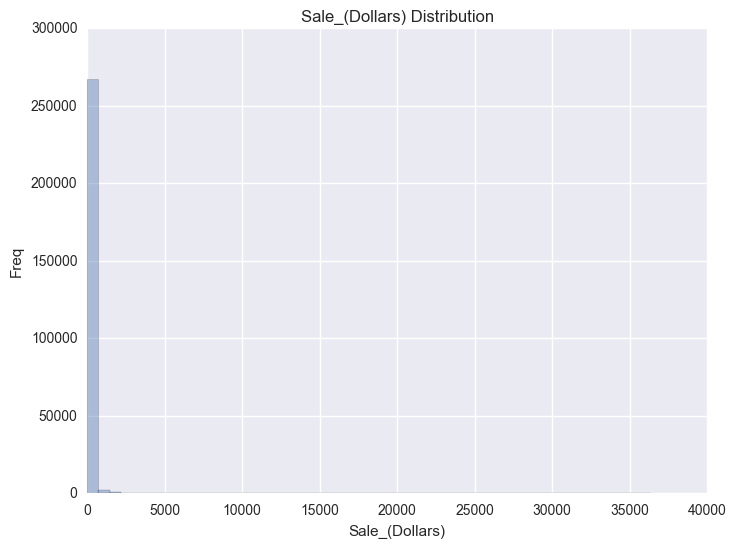

In [39]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot((df_test2['Sale_(Dollars)']),kde=False,ax=ax)
plt.title('Sale_(Dollars) Distribution')
plt.xlabel('Sale_(Dollars)')
plt.ylabel('Freq')


In [40]:
df_test2.dtypes

Date                             object
Store_Number                      int64
City                             object
Zip_Code                         object
County                           object
Category                         object
Category_Name                    object
Vendor_Number                     int64
Item_Number                       int64
Item_Description                 object
Bottle_Volume_(ml)                int64
State_Bottle_Cost               float64
State_Bottle_Retail             float64
Bottles_Sold                      int64
Sale_(Dollars)                  float64
Volume_Sold_(Liters)            float64
Volume_Sold_(Gallons)           float64
Seprate_date             datetime64[ns]
dtype: object

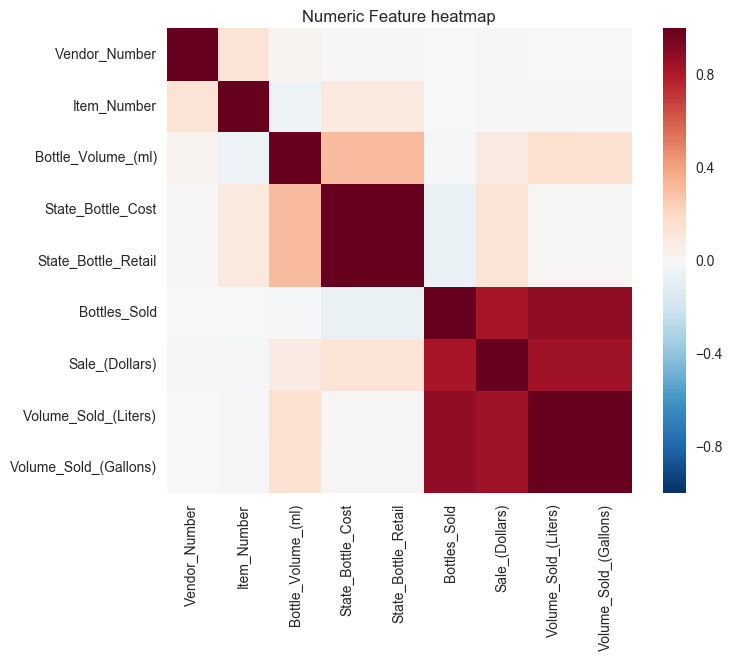

In [41]:
fig,ax = plt.subplots(figsize=(8,6))
correlation = df_test2.select_dtypes(include=['float64','int64']).iloc[:,1:].corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True)
plt.title('Numeric Feature heatmap')



In [42]:
corr_dict = correlation['Sale_(Dollars)'].to_dict()
del correlation['Sale_(Dollars)'] 
## correlation with sale price
for key,val in sorted(corr_dict.items(),key=lambda x:-abs(x[1])):
    print('{0} \t : {1}' .format(key,val))

Sale_(Dollars) 	 : 1.0
Volume_Sold_(Gallons) 	 : 0.846431940339
Volume_Sold_(Liters) 	 : 0.846420394642
Bottles_Sold 	 : 0.82544579508
State_Bottle_Retail 	 : 0.136114233589
State_Bottle_Cost 	 : 0.135930689772
Bottle_Volume_(ml) 	 : 0.0824455763378
Vendor_Number 	 : -0.0122770566779
Item_Number 	 : 0.00298701870783


### The Sale_(Dollars) strongly correlate with Volume_Sold_(Gallons),Volume_Sold_(Liters),Bottles_Sold,Bottle_Volume_(ml)

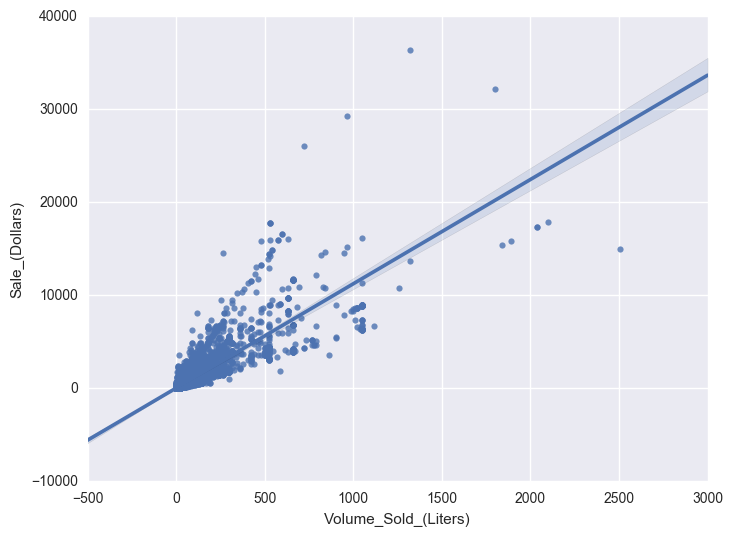

In [43]:
fig,ax = plt.subplots(figsize=(8,6))
sns.regplot(x = 'Volume_Sold_(Liters)', y='Sale_(Dollars)' , data=df_test2,ax=ax)



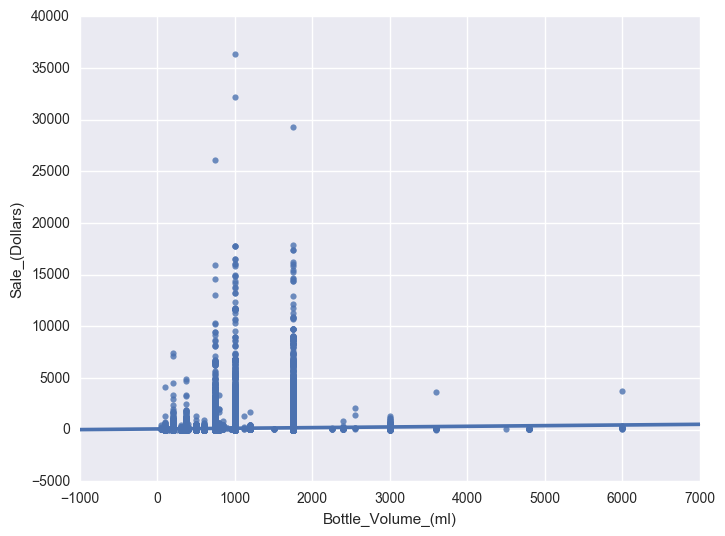

In [44]:
fig,ax = plt.subplots(figsize=(8,6))
sns.regplot(x = 'Bottle_Volume_(ml)', y='Sale_(Dollars)' , data=df_test2,ax=ax)


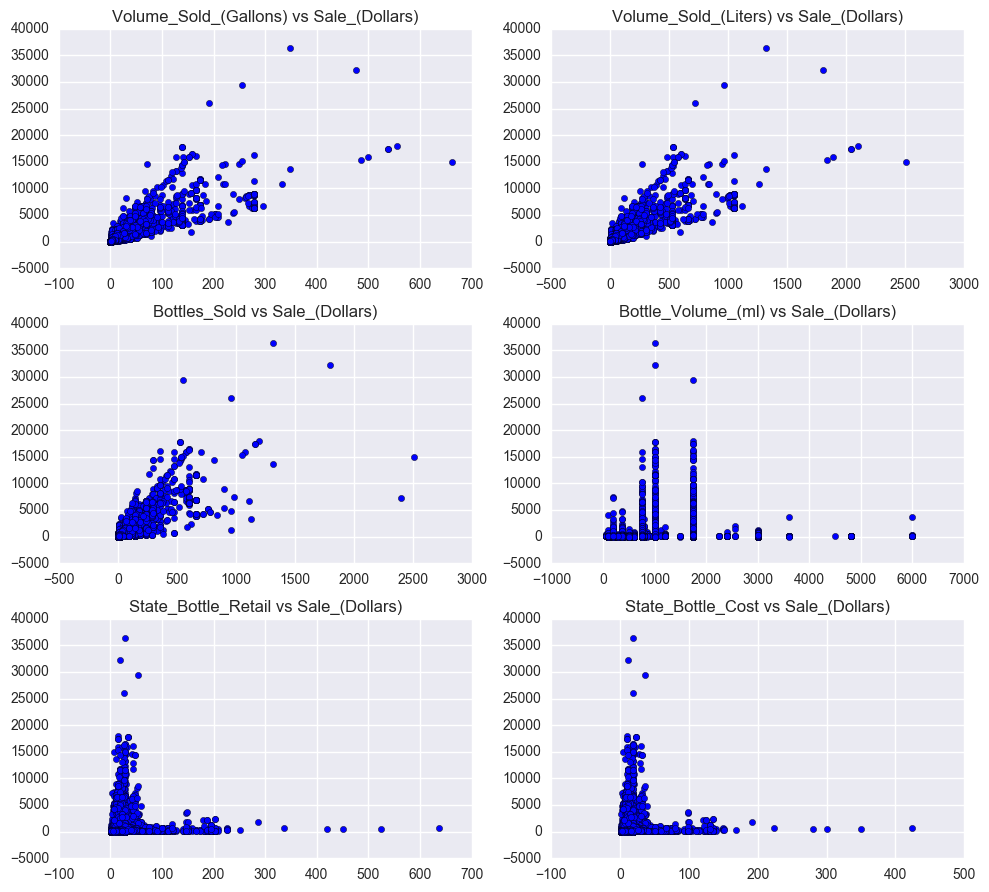

In [45]:
fig,ax = plt.subplots(3,2,figsize=(10,9))
sale_price = df_test2['Sale_(Dollars)'].values


ax[0,0].scatter(df_test2['Volume_Sold_(Gallons)'],sale_price)
ax[0,0].set_title('Volume_Sold_(Gallons) vs Sale_(Dollars)')

ax[0,1].scatter(df_test2['Volume_Sold_(Liters)'],sale_price)
ax[0,1].set_title('Volume_Sold_(Liters) vs Sale_(Dollars)')

ax[1,0].scatter(df_test2['Bottles_Sold'],sale_price)
ax[1,0].set_title('Bottles_Sold vs Sale_(Dollars)')

ax[1,1].scatter(df_test2['Bottle_Volume_(ml)'],sale_price)
ax[1,1].set_title('Bottle_Volume_(ml) vs Sale_(Dollars)')

ax[2,0].scatter(df_test2['State_Bottle_Retail'],sale_price)
ax[2,0].set_title('State_Bottle_Retail vs Sale_(Dollars)')

ax[2,1].scatter(df_test2['State_Bottle_Cost'],sale_price)
ax[2,1].set_title('State_Bottle_Cost vs Sale_(Dollars)')


plt.tight_layout()


## Categorical Feature

In [46]:
print(df_test2.select_dtypes(include=['object']).columns)

Index([u'Date', u'City', u'Zip_Code', u'County', u'Category', u'Category_Name',
       u'Item_Description'],
      dtype='object')


### County

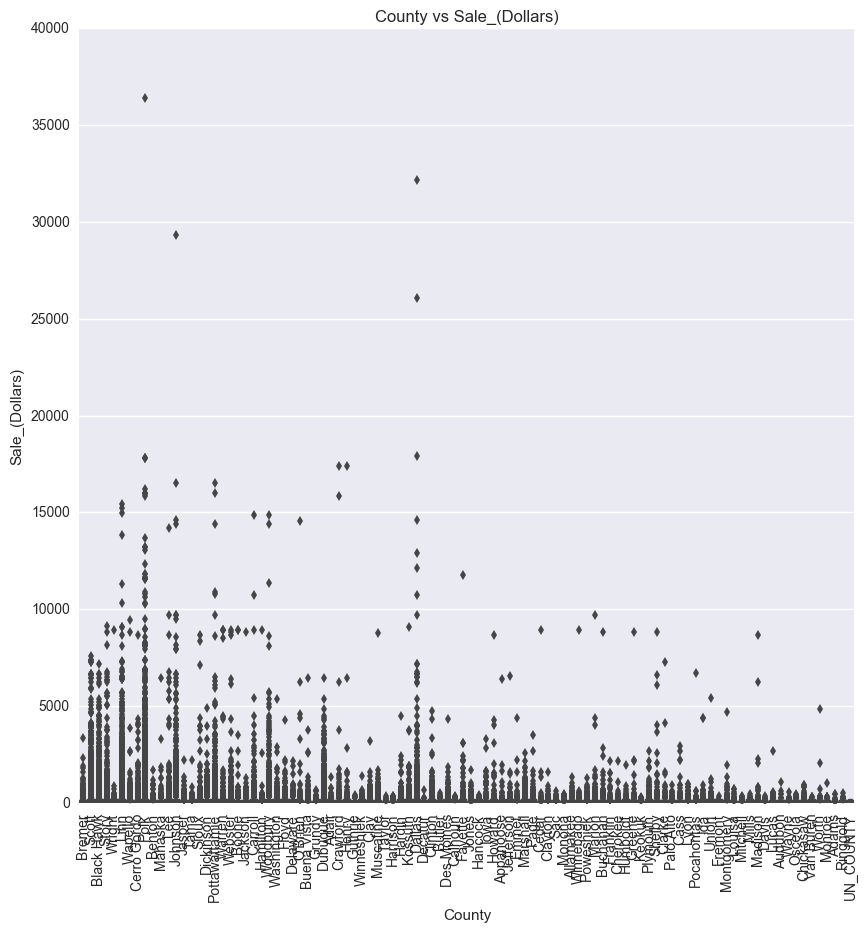

In [47]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'County', y = 'Sale_(Dollars)',  data = df_test2,ax=ax)
plt.title('County vs Sale_(Dollars)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)


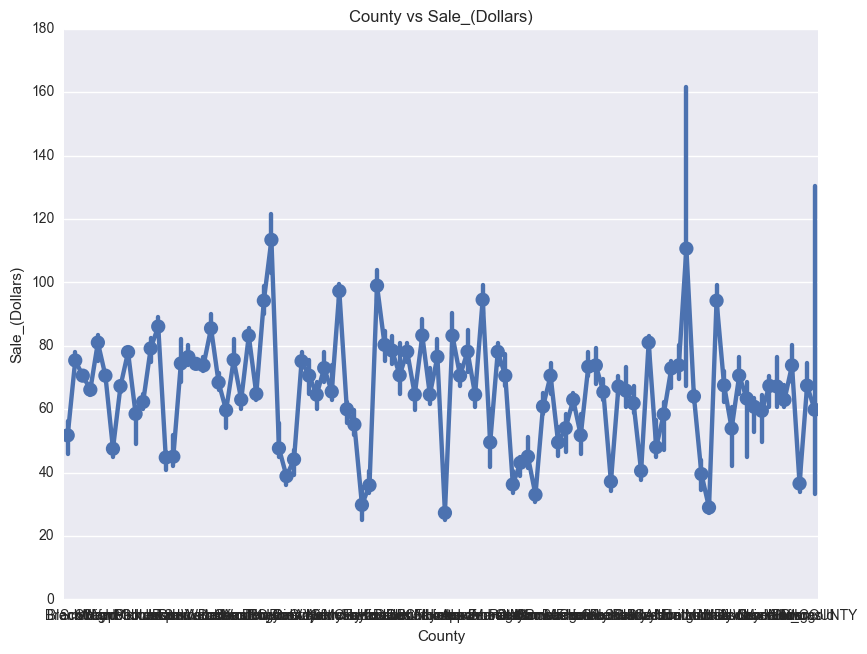

In [48]:
sns.factorplot(data=df_test2,x='County',y='Sale_(Dollars)',size=6.5,
              aspect=1.35,estimator=np.median)
plt.title('County vs Sale_(Dollars)')



# prepare the test and train lists

In [49]:
df_test3= copy.deepcopy(df_test2)

In [50]:
df_test3.head(2)

,Date,Store_Number,City,Zip_Code,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_(Dollars),Volume_Sold_(Liters),Volume_Sold_(Gallons),Seprate_date
0,11/04/2015,3717,SUMNER,50674,Bremer,1.0511e+06,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,2015-11-04
1,03/02/2016,2614,DAVENPORT,52807,Scott,1.0111e+06,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,2016-03-02


In [51]:
df_test3['year'] = df_test3['Seprate_date'].dt.year

In [52]:
df_test3['month'] = df_test3['Seprate_date'].dt.month

In [53]:
df_test3.head(2)

,Date,Store_Number,City,Zip_Code,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_(Dollars),Volume_Sold_(Liters),Volume_Sold_(Gallons),Seprate_date,year,month
0,11/04/2015,3717,SUMNER,50674,Bremer,1.0511e+06,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,2015-11-04,2015,11
1,03/02/2016,2614,DAVENPORT,52807,Scott,1.0111e+06,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,2016-03-02,2016,3


In [54]:
df_test3= df_test3.drop(['Date','City','Zip_Code','Category','Item_Description','Bottle_Volume_(ml)','Bottles_Sold','Volume_Sold_(Gallons)','Seprate_date'], axis=1)

In [55]:
df_test3.head(1)

,Store_Number,County,Category_Name,Vendor_Number,Item_Number,State_Bottle_Cost,State_Bottle_Retail,Sale_(Dollars),Volume_Sold_(Liters),year,month
0,3717,Bremer,APRICOT BRANDIES,55,54436,4.5,6.75,81.0,9.0,2015,11


In [56]:
df_test3.shape

(270955, 11)

## change to float numbers

In [58]:
#df_test3['Sale_(Dollars)'] = df_test3['Sale_(Dollars)'].str.replace(',', '')
#df_test3['Sale_(Dollars)'] = df_test3['Sale_(Dollars)'].str.replace('$', '')
#df_test3['Sale_(Dollars)']= df_test3['Sale_(Dollars)'].astype(float)


#df_test3['State_Bottle_Cost'] = df_test3['State_Bottle_Cost'].str.replace(',', '')
#df_test3['State_Bottle_Cost'] = df_test3['State_Bottle_Cost'].str.replace('$', '')
#df_test3['State_Bottle_Cost']= df_test3['State_Bottle_Cost'].astype(float)

#df_test3['State_Bottle_Retail'] = df_test3['State_Bottle_Retail'].str.replace(',', '')
#df_test3['State_Bottle_Retail'] = df_test3['State_Bottle_Retail'].str.replace('$', '')
#df_test3['State_Bottle_Retail']= df_test3['State_Bottle_Retail'].astype(float)


In [59]:
df_test3.head(10)

,Store_Number,County,Category_Name,Vendor_Number,Item_Number,State_Bottle_Cost,State_Bottle_Retail,Sale_(Dollars),Volume_Sold_(Liters),year,month
0,3717,Bremer,APRICOT BRANDIES,55,54436,4.50,6.75,81.00,9.00,2015,11
1,2614,Scott,BLENDED WHISKIES,395,27605,13.75,20.63,41.26,1.50,2016,3
2,2106,Black Hawk,STRAIGHT BOURBON WHISKIES,65,19067,12.59,18.89,453.36,24.00,2016,2
3,2501,Story,AMERICAN COCKTAILS,395,59154,9.50,14.25,85.50,10.50,2016,2
4,3654,Wright,VODKA 80 PROOF,297,35918,7.20,10.80,129.60,21.00,2015,8
5,2569,Linn,AMERICAN DRY GINS,205,31473,13.32,19.98,119.88,10.50,2015,4
6,2596,Wapello,AMERICAN GRAPE BRANDIES,85,52806,6.66,9.99,29.97,2.25,2015,8
7,3456,Cerro Gordo,CANADIAN WHISKIES,65,10628,15.75,23.63,47.26,3.50,2015,6
8,4757,Polk,IMPORTED VODKA,370,34006,11.49,17.24,68.96,3.00,2016,1
9,4346,Benton,CINNAMON SCHNAPPS,65,82610,7.62,11.43,22.86,2.00,2015,11


In [60]:
df_test4 = copy.deepcopy(df_test3)

## make dummy variable from county

In [61]:
df_dummies_county  = pd.get_dummies(df_test4['County'])

In [62]:
df_dummies_county.columns = [u'Adair', u'Adams', u'Allamakee', u'Appanoose', u'Audubon', u'Benton',u'Black Hawk', u'Boone', u'Bremer', u'Buchanan', u'Buena Vista',u'Butler', u'Calhoun', u'Carroll', u'Cass', u'Cedar', u'Cerro Gordo',u'Cherokee', u'Chickasaw', u'Clarke', u'Clay', u'Clayton', u'Clinton',u'Crawford', u'Dallas', u'Davis', u'Decatur', u'Delaware',
       u'Des Moines', u'Dickinson', u'Dubuque', u'Emmet', u'Fayette', u'Floyd',
       u'Franklin', u'Fremont', u'Greene', u'Grundy', u'Guthrie', u'Hamilton',
       u'Hancock', u'Hardin', u'Harrison', u'Henry', u'Howard', u'Humboldt',
       u'Ida', u'Iowa', u'Jackson', u'Jasper', u'Jefferson', u'Johnson',
       u'Jones', u'Keokuk', u'Kossuth', u'Lee', u'Linn', u'Louisa', u'Lucas',
       u'Lyon', u'Madison', u'Mahaska', u'Marion', u'Marshall', u'Mills',
       u'Mitchell', u'Monona', u'Monroe', u'Montgomery', u'Muscatine',
       u'O-Brien', u'Osceola', u'Page', u'Palo Alto', u'Plymouth',
       u'Pocahontas', u'Polk', u'Pottawattamie', u'Poweshiek', u'Ringgold',
       u'Sac', u'Scott', u'Shelby', u'Sioux', u'Story', u'Tama', u'Taylor',
       u'UN_COUNTY', u'Union', u'Van Buren', u'Wapello', u'Warren',
       u'Washington', u'Wayne', u'Webster', u'Winnebago', u'Winneshiek',
       u'Woodbury', u'Worth', u'Wright']

In [63]:
df_dummies_county.drop(['Adair'], axis=1, inplace=True)


In [64]:
df_test4 =df_test4.join(df_dummies_county)

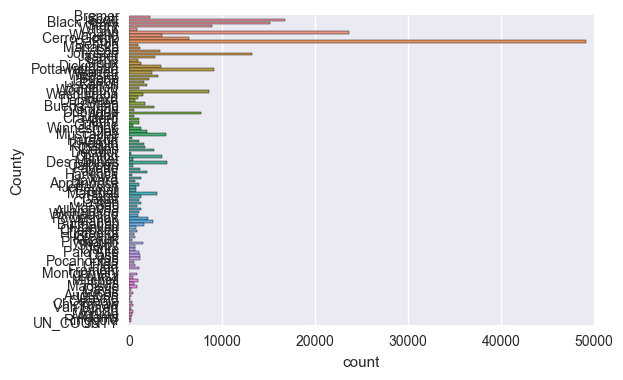

In [65]:
sns.countplot(y='County', data=df_test4)

#### since we have a lot of variables I try to make a model based on quarter sale and county for each store and make a model, predict. if the results was not good I try more variables

In [66]:
df_test5 = copy.deepcopy(df_test4)



In [67]:
df_total_15 = df_test5.groupby('year').get_group(2015)
df_total_16 = df_test5.groupby('year').get_group(2016)



In [68]:
df_total_15.head()



,Store_Number,County,Category_Name,Vendor_Number,Item_Number,State_Bottle_Cost,State_Bottle_Retail,Sale_(Dollars),Volume_Sold_(Liters),year,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,3717,Bremer,APRICOT BRANDIES,55,54436,4.50,6.75,81.00,9.00,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3654,Wright,VODKA 80 PROOF,297,35918,7.20,10.80,129.60,21.00,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,2569,Linn,AMERICAN DRY GINS,205,31473,13.32,19.98,119.88,10.50,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2596,Wapello,AMERICAN GRAPE BRANDIES,85,52806,6.66,9.99,29.97,2.25,2015,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3456,Cerro Gordo,CANADIAN WHISKIES,65,10628,15.75,23.63,47.26,3.50,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
df_total_15 = df_total_15.drop(['Category_Name','Vendor_Number','Item_Number','State_Bottle_Cost','State_Bottle_Retail','Volume_Sold_(Liters)','year'], axis=1)
df_total_16 = df_total_16.drop(['Category_Name','Vendor_Number','Item_Number','State_Bottle_Cost','State_Bottle_Retail','Volume_Sold_(Liters)','year'], axis=1)


In [70]:
df_total_15.head()



,Store_Number,County,Sale_(Dollars),month,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,3717,Bremer,81.00,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3654,Wright,129.60,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,2569,Linn,119.88,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2596,Wapello,29.97,8,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3456,Cerro Gordo,47.26,6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## I make 3 different dataframes and merge them together

In [71]:
df_total_15_group = df_total_15.groupby(by=['Store_Number','month'])['Sale_(Dollars)'].sum()
d1 = pd.DataFrame(df_total_15_group)
d1 = d1.reset_index() #Nathen help me withthis command
d1.columns=['Store_Number','month','Sale_total_month']
d1
d2_2015_month_eachstore = copy.deepcopy(d1)



In [72]:
e1 = d1[d1['Store_Number'].notnull() & (d1['month'] < 4)]
e2 = e1.groupby(by=['Store_Number'])['Sale_total_month'].sum()
d1 = pd.DataFrame(e2)
d1 = d1.reset_index()

## I have quarter sale for each store





In [73]:
d1



,Store_Number,Sale_total_month
0,2106,39287.29
1,2113,2833.25
2,2130,24272.57
3,2152,2003.46
4,2178,5856.41
5,2190,29452.92
6,2191,29085.57
7,2200,4900.43
8,2205,6407.74
9,2228,5193.97


In [74]:

### dataset for total sale of the year 2015 each store


In [75]:
df_total_15_group2 = df_total_15.groupby(by=['Store_Number'])['Sale_(Dollars)'].sum()
d2=pd.DataFrame(df_total_15_group2)
d2 = d2.reset_index()
d2.columns=['Store_Number','Sale_total_year']
d2_2015_data_totalyear = copy.deepcopy(d2)


### dataset for total sale of the year 2015 each store



In [76]:
d2

#39287.29
146326.22

146326.22

## merging two dataframs and filing the missing value (thanks to Joseph)


In [77]:
common_cols = list(set(d2.columns) & set(d1.columns))



In [78]:
mergedata=pd.merge(d2, d1, on=common_cols, how='outer')



In [79]:
mergedata.isnull().sum()



Store_Number          0
Sale_total_year       0
Sale_total_month    110
dtype: int64

In [80]:
mergedata['Sale_total_month'] = mergedata['Sale_total_month'].fillna(10)
mergedata.isnull().sum()

mergedata

,Store_Number,Sale_total_year,Sale_total_month
0,2106,146326.22,39287.29
1,2113,9310.22,2833.25
2,2130,111871.43,24272.57
3,2152,7721.08,2003.46
4,2178,24324.18,5856.41
5,2190,121689.06,29452.92
6,2191,125093.49,29085.57
7,2200,22811.55,4900.43
8,2205,24681.39,6407.74
9,2228,17462.07,5193.97


## making the third dataframe (county)

In [81]:
df_total_15.shape



(218594, 103)

In [82]:
df_total_15.head()



,Store_Number,County,Sale_(Dollars),month,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,3717,Bremer,81.00,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3654,Wright,129.60,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,2569,Linn,119.88,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2596,Wapello,29.97,8,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3456,Cerro Gordo,47.26,6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
df_county_df = df_total_15.drop(['County','Sale_(Dollars)','month'], axis=1)
df_county_df.shape



(218594, 100)

In [84]:
df_county_df=df_county_df.sort('Store_Number').drop_duplicates(subset=['Store_Number'], take_last=True)



/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead
  if __name__ == '__main__':


In [85]:
df_county_df.shape


(1372, 100)

In [86]:
finald=pd.merge(mergedata, df_county_df,  how='outer')

finald


,Store_Number,Sale_total_year,Sale_total_month,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,2106,146326.22,39287.29,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2113,9310.22,2833.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2130,111871.43,24272.57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2152,7721.08,2003.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2178,24324.18,5856.41,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2190,121689.06,29452.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2191,125093.49,29085.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2200,22811.55,4900.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2205,24681.39,6407.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2228,17462.07,5193.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:

data_finale_15_model = copy.deepcopy(finald)


### making a model

In [88]:
data_finale_15_model.columns

Index([    u'Store_Number',  u'Sale_total_year', u'Sale_total_month',
                  u'Adams',        u'Allamakee',        u'Appanoose',
                u'Audubon',           u'Benton',       u'Black Hawk',
                  u'Boone',
       ...
                u'Wapello',           u'Warren',       u'Washington',
                  u'Wayne',          u'Webster',        u'Winnebago',
             u'Winneshiek',         u'Woodbury',            u'Worth',
                 u'Wright'],
      dtype='object', length=102)

In [89]:
data_finale_15_model.shape

(1372, 102)

In [90]:
X=  data_finale_15_model.drop(['Store_Number','Sale_total_year'], axis=1)
#X=data_finale_15_model['Sale_total_month']
type(X)
X.head()



,Sale_total_month,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,Buchanan,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,39287.29,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2833.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,24272.57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5856.41,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
y = data_finale_15_model['Sale_total_year'].astype('int')
type(X)
print type(y.values)

<type 'numpy.ndarray'>


## LogisticRegressionCV, default value

In [92]:
#make a train test , and model
from sklearn import metrics
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

# STEP 2: train the model on the training set 
logreg = LogisticRegressionCV()
logreg.fit(X, y)

print logreg.coef_
print logreg.intercept_


# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = logreg.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)


//anaconda/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


[[ -6.08181836e-03  -1.38011491e-12  -5.96701335e-07 ...,  -2.04875585e-06
   -1.75797941e-08  -4.47998902e-07]
 [ -5.94940082e-03   3.98509403e-11  -6.09927989e-07 ...,  -2.03914288e-06
   -1.83797398e-08  -4.59645362e-07]
 [ -4.80633526e-03  -1.18499985e-11  -6.18274858e-07 ...,  -2.04529694e-06
   -3.39385369e-08  -4.86378731e-07]
 ..., 
 [  5.84734148e-05  -4.67813063e-08   4.41228726e-07 ...,   1.13324616e-06
    4.00400062e-08   6.19259276e-07]
 [  7.83811917e-05  -6.22010640e-11   3.29592386e-09 ...,  -1.75422904e-08
    6.87828266e-10   5.78953706e-09]
 [  1.99058811e-03  -1.53607098e-06   4.43592385e-06 ...,  -5.69245706e-06
   -3.28587944e-06   2.22737376e-06]]
[  -4.99089948   -5.00047637   -5.09921865 ...,  -13.07500997  -16.11872353
 -408.91385499]
0.00291545189504


In [93]:
type(X_test)

pandas.core.frame.DataFrame

## LinearRegression, X train and Y train

In [94]:
import sklearn.linear_model as lm
linreg = lm.LinearRegression()
#linreg.fit(np.transpose(np.matrix(X_train)), np.transpose(np.matrix(y_train)))
linreg.fit(X_train, y_train)
Y_pred = linreg.predict(X_test)

In [95]:
linreg.coef_


array([  4.47441654e+00,   3.96437619e+02,   3.25328339e+03,
         1.55253191e+03,  -3.61676176e+03,  -6.28499669e+02,
         1.67905159e+03,   3.86389024e+02,  -1.45256754e+03,
         1.17907995e+03,  -1.39724103e+03,   1.40349285e+03,
         9.74615401e+02,  -2.64950370e+03,   1.85993404e+03,
         1.19364805e+03,   5.46791904e+03,   4.40351119e+03,
        -8.31281971e+02,   5.64415233e+03,   2.81277673e+02,
        -5.11215491e+02,   1.34326728e+03,  -1.66816589e+03,
         2.28821630e+03,   1.72192984e+03,  -8.19249159e+02,
        -1.27124505e+02,   1.14833557e+02,   7.30500598e+03,
         1.71321223e+01,  -9.04009055e+02,   4.22200891e+03,
         9.75196318e+02,   2.68536327e+02,  -4.27588630e+12,
        -2.20791031e+02,  -7.65097740e+02,   7.75100315e+02,
        -3.54290832e+02,  -1.31200451e+03,   1.01951301e+03,
        -1.35993516e+03,   9.04635373e+03,  -1.49462120e+04,
        -9.43006885e+02,   1.00055699e+04,  -2.27164863e+03,
        -5.55402144e+02,

In [96]:
#linreg.score(X_test.reshape(X_test.shape[0], 1), Y_pred)
linreg.score(X_test, Y_pred)

1.0

## LogisticRegressionCV (Cs= 15)

In [97]:
#make a train test , and model
from sklearn import metrics
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

# STEP 2: train the model on the training set 
logreg = LogisticRegressionCV(Cs =15)
logreg.fit(X, y)

print logreg.coef_
print logreg.intercept_


# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = logreg.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)


[[ -6.08181836e-03  -1.38011491e-12  -5.96701335e-07 ...,  -2.04875585e-06
   -1.75797941e-08  -4.47998902e-07]
 [ -5.94940082e-03   3.98509403e-11  -6.09927989e-07 ...,  -2.03914288e-06
   -1.83797398e-08  -4.59645362e-07]
 [ -4.80633526e-03  -1.18499985e-11  -6.18274858e-07 ...,  -2.04529694e-06
   -3.39385369e-08  -4.86378731e-07]
 ..., 
 [  5.84734148e-05  -4.67813063e-08   4.41228726e-07 ...,   1.13324616e-06
    4.00400062e-08   6.19259276e-07]
 [  7.83811917e-05  -6.22010640e-11   3.29592386e-09 ...,  -1.75422904e-08
    6.87828266e-10   5.78953706e-09]
 [  1.99058811e-03  -1.53607098e-06   4.43592385e-06 ...,  -5.69245706e-06
   -3.28587944e-06   2.22737376e-06]]
[  -4.99089948   -5.00047637   -5.09921865 ...,  -13.07500997  -16.11872353
 -408.91385499]
0.0145772594752


## LogisticRegressionCV(Cs= 100)

In [98]:
#make a train test , and model
from sklearn import metrics
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

# STEP 2: train the model on the training set 
logreg = LogisticRegressionCV(Cs= 100)
logreg.fit(X, y)

print logreg.coef_
print logreg.intercept_


# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = logreg.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)


KeyboardInterrupt: 

## create 2016 dataset features+target for the first 3 months 2016

## the first dataset

In [99]:
df_total_16_group = df_total_16.groupby(by=['Store_Number','month'])['Sale_(Dollars)'].sum()
d11 = pd.DataFrame(df_total_16_group)
d11 = d11.reset_index() #Nathen help me withthis command
d11.columns=['Store_Number','month','Sale_total_month']

d2_2016_month_eachstore = copy.deepcopy(d11)
e11 = d11[d11['Store_Number'].notnull() & (d11['month'] < 4)]
e21 = e11.groupby(by=['Store_Number'])['Sale_total_month'].sum()
d11 = pd.DataFrame(e21)
d11 = d11.reset_index()

## I have quarter sale for each store

d11

,Store_Number,Sale_total_month
0,2106,30523.75
1,2113,2065.90
2,2130,27856.11
3,2152,1376.43
4,2178,5588.50
5,2190,34515.69
6,2191,47338.20
7,2200,4174.87
8,2228,3086.38
9,2233,6522.65


In [100]:
df_total_16_group2 = df_total_16.groupby(by=['Store_Number'])['Sale_(Dollars)'].sum()
d21=pd.DataFrame(df_total_16_group2)
d21 = d21.reset_index()
d21.columns=['Store_Number','Sale_total_year']
d2_2016_data_totalyear = copy.deepcopy(d21)

d21

,Store_Number,Sale_total_year
0,2106,30523.75
1,2113,2065.90
2,2130,27856.11
3,2152,1376.43
4,2178,5588.50
5,2190,34515.69
6,2191,47338.20
7,2200,4174.87
8,2228,3086.38
9,2233,6522.65


In [101]:
## statistical analysis
df_county_df_16 = df_total_16.drop(['County','Sale_(Dollars)','month'], axis=1)
df_county_df_16.shape
df_county_df_16=df_county_df_16.sort('Store_Number').drop_duplicates(subset=['Store_Number'], take_last=True)
finald_16=pd.merge(  df_county_df,d11,  how='outer')
finald_16

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead


,Store_Number,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,Buchanan,...,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright,Sale_total_month
0,2106.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30523.75
1,2113.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2065.90
2,2130.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27856.11
3,2152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1376.43
4,2178.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5588.50
5,2190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34515.69
6,2191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47338.20
7,2200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4174.87
8,2205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9,2228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3086.38


In [102]:
## using for my dataset to predict
df_county_df_16 = df_total_16.drop(['County','Sale_(Dollars)','month'], axis=1)
df_county_df_16.shape
df_county_df_16=df_county_df_16.sort('Store_Number').drop_duplicates(subset=['Store_Number'], take_last=True)
finald_16_new=pd.merge(  d11,df_county_df_16,  how='outer')
finald_16_new

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead


,Store_Number,Sale_total_month,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,2106,30523.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2113,2065.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2130,27856.11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2152,1376.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2178,5588.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2190,34515.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2191,47338.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2200,4174.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2228,3086.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2233,6522.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 28 new stores open in the first quarter.

## 63 stores closes during the first quarter or no data 

In [103]:
finald_16_new.columns

Index([    u'Store_Number', u'Sale_total_month',            u'Adams',
              u'Allamakee',        u'Appanoose',          u'Audubon',
                 u'Benton',       u'Black Hawk',            u'Boone',
                 u'Bremer',
       ...
                u'Wapello',           u'Warren',       u'Washington',
                  u'Wayne',          u'Webster',        u'Winnebago',
             u'Winneshiek',         u'Woodbury',            u'Worth',
                 u'Wright'],
      dtype='object', length=101)

In [104]:
X_test_16 = finald_16_new
X_test_16=pd.DataFrame(X_test_16)

In [105]:
type(X_test_16)

pandas.core.frame.DataFrame

In [106]:
X_test_16.head()

,Store_Number,Sale_total_month,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,2106,30523.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2113,2065.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2130,27856.11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2152,1376.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2178,5588.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
X_test_16_drop=  X_test_16.drop(['Store_Number'], axis=1)
X_test_16_drop.head()

,Sale_total_month,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,Buchanan,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,30523.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2065.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,27856.11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1376.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5588.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## predict the total sale of 2016

In [108]:
#pp=np.transpose(np.matrix(X_test_16))
Y_pred_16 = linreg.predict(X_test_16_drop)

In [109]:
Y_pred_16

array([  1.38020041e+05,   1.02651417e+04,   1.26083909e+05, ...,
        -3.39421725e+03,  -2.57056665e+03,  -5.05696744e+01])

In [110]:
len(Y_pred_16)

1309

In [111]:
X_test_16.shape

(1309, 101)

In [112]:
X_test.head()

,Sale_total_month,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,Buchanan,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
1159,1298.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,2736.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
776,175.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
819,81.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1271,1555.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### prepare a dataset for store and county

## create two datasets (store and prediction and quarter)

In [113]:
df_graph = X_test_16[['Store_Number','Sale_total_month']]

In [114]:
df_graph.shape

(1309, 2)

In [115]:
df_graph.head()

,Store_Number,Sale_total_month
0,2106,30523.75
1,2113,2065.90
2,2130,27856.11
3,2152,1376.43
4,2178,5588.50


In [116]:
type(df_graph)

pandas.core.frame.DataFrame

In [117]:
type(Y_pred_16)

numpy.ndarray

In [118]:
df_graph2 = pd.DataFrame(Y_pred_16)

In [119]:

df_graph2.columns=['Sale_total_year']

In [120]:
df_graph2

,Sale_total_year
0,138020.041162
1,10265.141663
2,126083.908610
3,11391.657759
4,28023.577814
5,156303.305692
6,212694.408034
7,19656.876796
8,-148.677224
9,36255.076617


In [121]:
df_graph2

,Sale_total_year
0,138020.041162
1,10265.141663
2,126083.908610
3,11391.657759
4,28023.577814
5,156303.305692
6,212694.408034
7,19656.876796
8,-148.677224
9,36255.076617


In [122]:
df_graph2.shape

(1309, 1)

In [123]:
df_graph['tmp'] = 1
df_graph2['tmp'] = 1

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [124]:
df_graph_both = pd.merge(df_graph, df_graph2,how='outer')

In [125]:
df_graph2.shape

(1309, 2)

In [126]:
df_graph.head()

,Store_Number,Sale_total_month,tmp
0,2106,30523.75,1
1,2113,2065.90,1
2,2130,27856.11,1
3,2152,1376.43,1
4,2178,5588.50,1


In [127]:
df_graph2.head()

,Sale_total_year,tmp
0,138020.041162,1
1,10265.141663,1
2,126083.908610,1
3,11391.657759,1
4,28023.577814,1


In [128]:
frames = [df_graph, df_graph2]

In [129]:
result = pd.concat(frames)

In [130]:
result

,Sale_total_month,Sale_total_year,Store_Number,tmp
0,30523.75,NaN,2106.0,1
1,2065.90,NaN,2113.0,1
2,27856.11,NaN,2130.0,1
3,1376.43,NaN,2152.0,1
4,5588.50,NaN,2178.0,1
5,34515.69,NaN,2190.0,1
6,47338.20,NaN,2191.0,1
7,4174.87,NaN,2200.0,1
8,3086.38,NaN,2228.0,1
9,6522.65,NaN,2233.0,1


In [131]:
result.dropna()

,Sale_total_month,Sale_total_year,Store_Number,tmp


In [132]:
df_graph['tmp'] = 1
df_graph2['tmp'] = 1
df_graph_both = pd.merge(df_graph, df_graph2,how='outer')
df_graph_both = df_graph_both.drop('tmp', axis=1)

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [133]:
df_graph_both 

,Store_Number,Sale_total_month,Sale_total_year
0,2106,30523.75,138020.041162
1,2106,30523.75,10265.141663
2,2106,30523.75,126083.908610
3,2106,30523.75,11391.657759
4,2106,30523.75,28023.577814
5,2106,30523.75,156303.305692
6,2106,30523.75,212694.408034
7,2106,30523.75,19656.876796
8,2106,30523.75,-148.677224
9,2106,30523.75,36255.076617


In [134]:
df_total_16_new_df = df_total_16[['Store_Number','County']]

In [135]:
df_total_16_new_df.head()

,Store_Number,County
1,2614,Scott
2,2106,Black Hawk
3,2501,Story
8,4757,Polk
13,4673,Lee
